# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading data

In [2]:
df = pd.read_csv('winequality-red.csv')
df.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5  
5      9.4        5  
6      9.4        5  
7     10.0        7  
8      9.5        7  
9     10.5        5

In [3]:
df.shape

(1599, 12)

In [4]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# Checking null values

In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No null value exists

# Pairplots

In [6]:
sns.pairplot(df, hue='quality', height = 10).add_legend()
plt.show()

# Spliting into label and features

In [7]:
label = df['quality']
df.drop('quality', axis=1, inplace = True)

# Standardization

In [8]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df_std = ss.fit_transform(df)

# Dimensionality Reduction

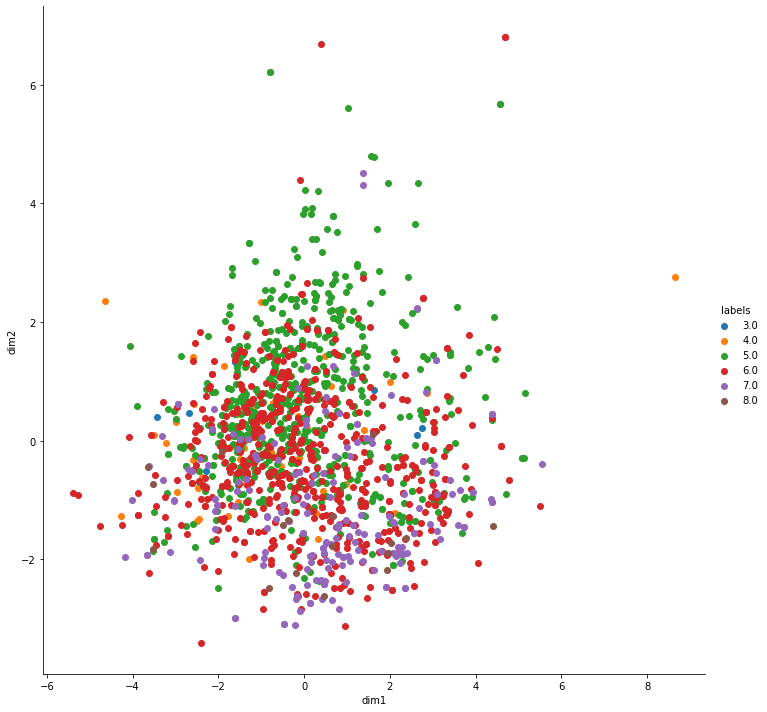

In [9]:
from sklearn import decomposition
pca = decomposition.PCA(n_components = 2)
pca_data = pca.fit_transform(df_std)
pca_data = np.vstack((pca_data.T, label)).T
pca_df = pd.DataFrame(data=pca_data, columns=('dim1', 'dim2', 'labels'))
sns.FacetGrid(pca_df, hue='labels', height=10).map(plt.scatter, 'dim1', 'dim2').add_legend()
plt.show()

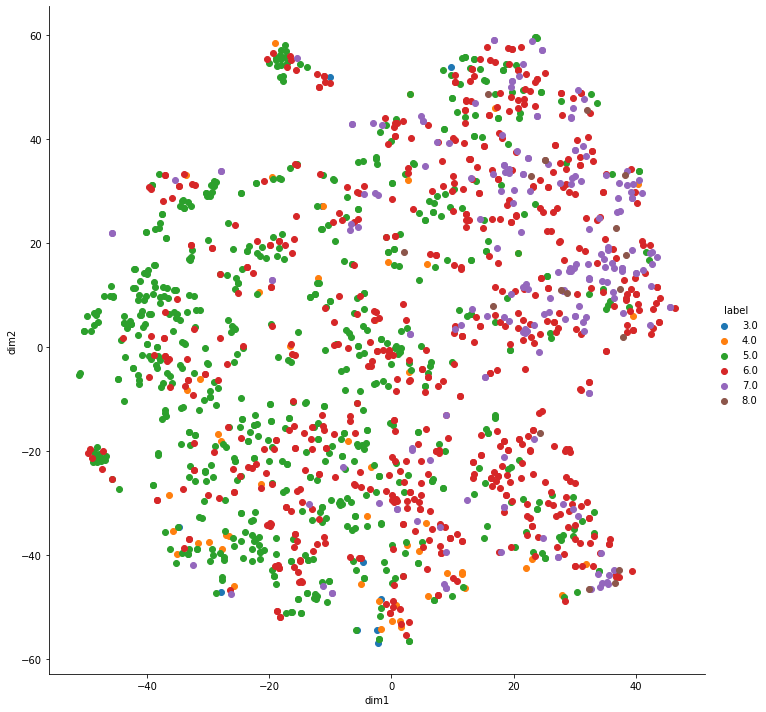

In [10]:
#APPLYING TSNE FOR DIMENSIONALTY REDUCTION

from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0, perplexity=30, n_iter=1000)
tsne_data = model.fit_transform(df_std)

tsne_data = np.vstack((tsne_data.T, label)).T
df_tsne = pd.DataFrame(data= tsne_data, columns=('dim1', 'dim2', 'label'))

sns.FacetGrid(df_tsne, hue='label', height=10).map(plt.scatter, 'dim1', 'dim2').add_legend()
plt.show()

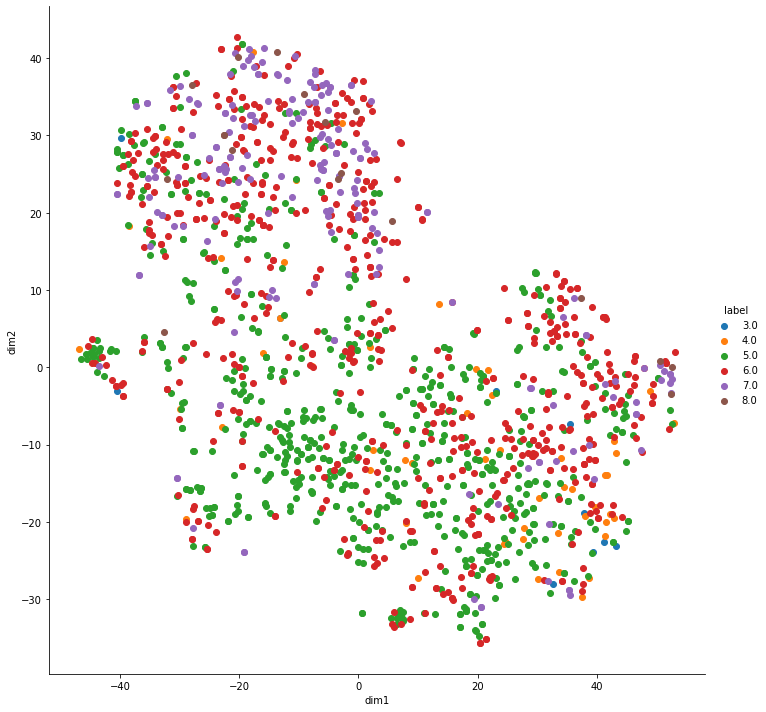

In [11]:
#APPLYING TSNE FOR DIMENSIONALTY REDUCTION

from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0, perplexity=50, n_iter=1000)
tsne_data = model.fit_transform(df_std)

tsne_data = np.vstack((tsne_data.T, label)).T
df_tsne = pd.DataFrame(data= tsne_data, columns=('dim1', 'dim2', 'label'))

sns.FacetGrid(df_tsne, hue='label', height=10).map(plt.scatter, 'dim1', 'dim2').add_legend()
plt.show()

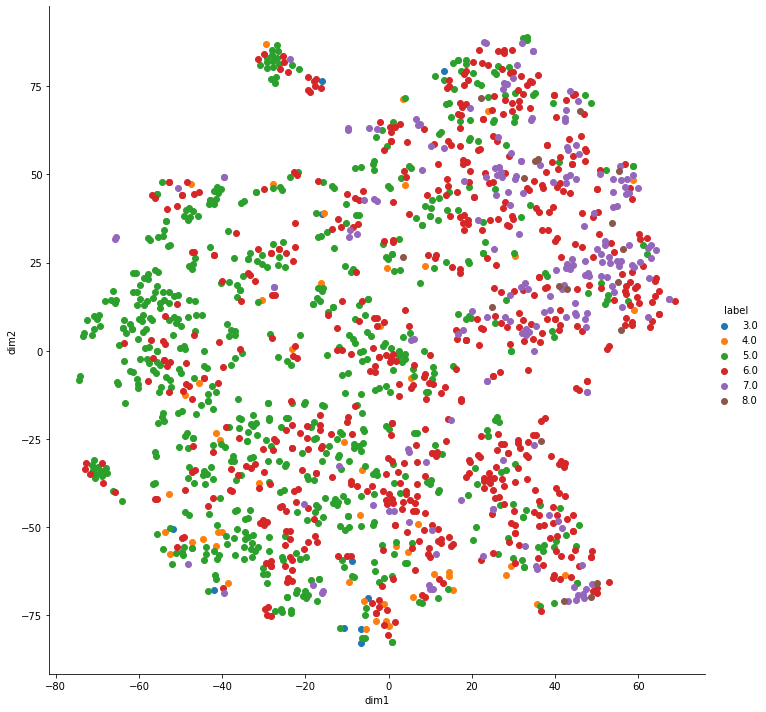

In [12]:
#APPLYING TSNE FOR DIMENSIONALTY REDUCTION

from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0, perplexity=30, n_iter=5000)
tsne_data = model.fit_transform(df_std)

tsne_data = np.vstack((tsne_data.T, label)).T
df_tsne = pd.DataFrame(data= tsne_data, columns=('dim1', 'dim2', 'label'))

sns.FacetGrid(df_tsne, hue='label', height=10).map(plt.scatter, 'dim1', 'dim2').add_legend()
plt.show()

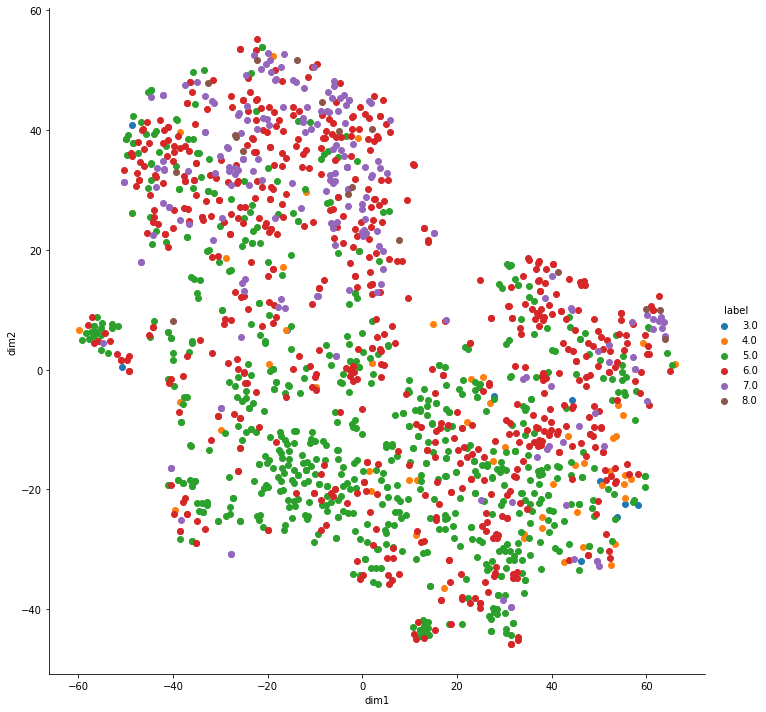

In [13]:
#APPLYING TSNE FOR DIMENSIONALTY REDUCTION

from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0, perplexity=50, n_iter=5000)
tsne_data = model.fit_transform(df_std)

tsne_data = np.vstack((tsne_data.T, label)).T
df_tsne = pd.DataFrame(data= tsne_data, columns=('dim1', 'dim2', 'label'))

sns.FacetGrid(df_tsne, hue='label', height=10).map(plt.scatter, 'dim1', 'dim2').add_legend()
plt.show()

# Spliting the dataset into train and test

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df, label, test_size=0.2, random_state=3)

# Standardization the x_train and y_train for optimized result

In [16]:
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

# Classification and prediction of data

In [17]:
#using decision tree
from sklearn import tree
clf_tree = tree.DecisionTreeClassifier()
clf_tree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = clf_tree.predict(x_test)
print(classification_report(y_test, pred))
print()
print('Confusion Matrix:\n',confusion_matrix(y_test, pred))
print()
print('Accuracy : ',accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.22      0.17      0.19        12
           5       0.69      0.77      0.73       138
           6       0.68      0.60      0.64       131
           7       0.50      0.50      0.50        36
           8       0.00      0.00      0.00         1

    accuracy                           0.64       320
   macro avg       0.35      0.34      0.34       320
weighted avg       0.64      0.64      0.64       320


Confusion Matrix:
 [[  0   0   2   0   0   0]
 [  0   2   7   1   2   0]
 [  1   6 106  24   1   0]
 [  1   1  34  79  15   1]
 [  0   0   4  12  18   2]
 [  0   0   0   1   0   0]]

Accuracy :  0.640625


In [19]:
#using randomforestclassifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [20]:
pred = clf.predict(x_test)
print(classification_report(y_test, pred))
print()
print('Confusion Matrix:\n',confusion_matrix(y_test, pred))
print()
print('Accuracy : ',accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        12
           5       0.63      0.77      0.70       138
           6       0.53      0.62      0.57       131
           7       0.00      0.00      0.00        36
           8       0.00      0.00      0.00         1

    accuracy                           0.58       320
   macro avg       0.19      0.23      0.21       320
weighted avg       0.49      0.58      0.53       320


Confusion Matrix:
 [[  0   0   1   1   0   0]
 [  0   0   8   4   0   0]
 [  0   0 106  32   0   0]
 [  0   0  50  81   0   0]
 [  0   0   2  34   0   0]
 [  0   0   0   1   0   0]]

Accuracy :  0.584375


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [22]:
pred = neigh.predict(x_test)
print(classification_report(y_test, pred))
print()
print('Confusion Matrix:\n',confusion_matrix(y_test, pred))
print()
print('Accuracy : ',accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.17      0.17      0.17        12
           5       0.66      0.70      0.68       138
           6       0.59      0.60      0.59       131
           7       0.62      0.50      0.55        36
           8       0.00      0.00      0.00         1

    accuracy                           0.61       320
   macro avg       0.34      0.33      0.33       320
weighted avg       0.60      0.61      0.61       320


Confusion Matrix:
 [[ 0  1  0  1  0  0]
 [ 0  2  7  3  0  0]
 [ 1  4 97 35  1  0]
 [ 0  5 39 78  9  0]
 [ 0  0  3 15 18  0]
 [ 0  0  0  0  1  0]]

Accuracy :  0.609375


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(penalty=None)
sgd.fit(x_train, y_train)
pred_sgd = sgd.predict(x_test)

In [26]:
pred = sgd.predict(x_test)
print(classification_report(y_test, pred))
print()
print('Confusion Matrix:\n',confusion_matrix(y_test, pred))
print()
print('Accuracy : ',accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        12
           5       0.57      0.83      0.67       138
           6       0.53      0.40      0.46       131
           7       0.33      0.14      0.20        36
           8       0.00      0.00      0.00         1

    accuracy                           0.54       320
   macro avg       0.24      0.23      0.22       320
weighted avg       0.50      0.54      0.50       320


Confusion Matrix:
 [[  0   0   1   1   0   0]
 [  2   0   9   1   0   0]
 [  0   1 114  23   0   0]
 [  0   0  67  53  10   1]
 [  0   0  10  21   5   0]
 [  0   0   0   1   0   0]]

Accuracy :  0.5375
